In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-23 10:29:32.132583: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone13_I_BeSh dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Location_oriented/iPhone13_Beer Sheve,Israel/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[ 0.0859375+0.09375j    0.5625   -0.8046875j -0.984375 +0.4921875j ...
  0.015625 +0.0078125j  0.015625 +0.j         0.0078125+0.0078125j]
2048
143874
(2048, 143874)
[0.04423329 0.07092105 0.03909327 ... 0.03002222 0.05070389 0.04089695]
0
(10000, 2048)
(10000,)
[0.0078125+0.j        0.0234375-0.0078125j 0.015625 +0.015625j  ...
 0.0234375+0.j        0.015625 +0.0078125j 0.015625 -0.0078125j]
2048
141168
(2048, 141168)
[0.01816647 0.00949077 0.0032181  ... 0.00174878 0.00344826 0.00946195]
1
(20000, 2048)
(20000,)
[ 0.0078125+0.j        -0.0078125+0.0078125j  0.0234375+0.015625j  ...
  0.015625 +0.j         0.015625 +0.0078125j  0.015625 +0.j       ]
2048
154773
(2048, 154773)
[0.01807312 0.00971989 0.00374065 ... 0.00206749 0.00380799 0.00961199]
2
(30000, 2048)
(30000,)
[0.0078125+0.j        0.0234375+0.0078125j 0.015625 +0.j        ...
 0.0234375+0.0078125j 0.015625 +0.015625j  0.015625 +0.0078125j]
2048
131588
(2048, 131588)
[0.02084354 0.01262699 0.00525135 ... 0.00556843 0.005412

## Cross-model Validation

## iPhone13_I model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_model.h5")
model.summary()

2023-02-22 14:48:04.104761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 11.2985 - accuracy: 0.1892
test loss, test acc: [11.298463821411133, 0.18918000161647797]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[    2     5     0     0     0     0     0     0     0  9993]
 [   35  9384   250     0     0    20   294     0    17     0]
 [    1     3     2     1     0  4710     0     3  5280     0]
 [    0     0     0     0     0     0     0     0     0 10000]
 [    0  1337   428     7     0  8071     0     0   157     0]
 [ 8696     0     0     0     0     0  1304     0     0     0]
 [  103    18   349     0     0     0  9530     0     0     0]
 [    1     0     0     0     0     1     0     0  9998     0]
 [ 7711     0     0     0     0     0  2289     0     0     0]
 [    0  1894     6     0     8  2626     1     0  5465     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.74      0.94      0.83     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0

Test Accuracy:0.18918


Text(0.5, 1.0, 'Accuracy:0.189')

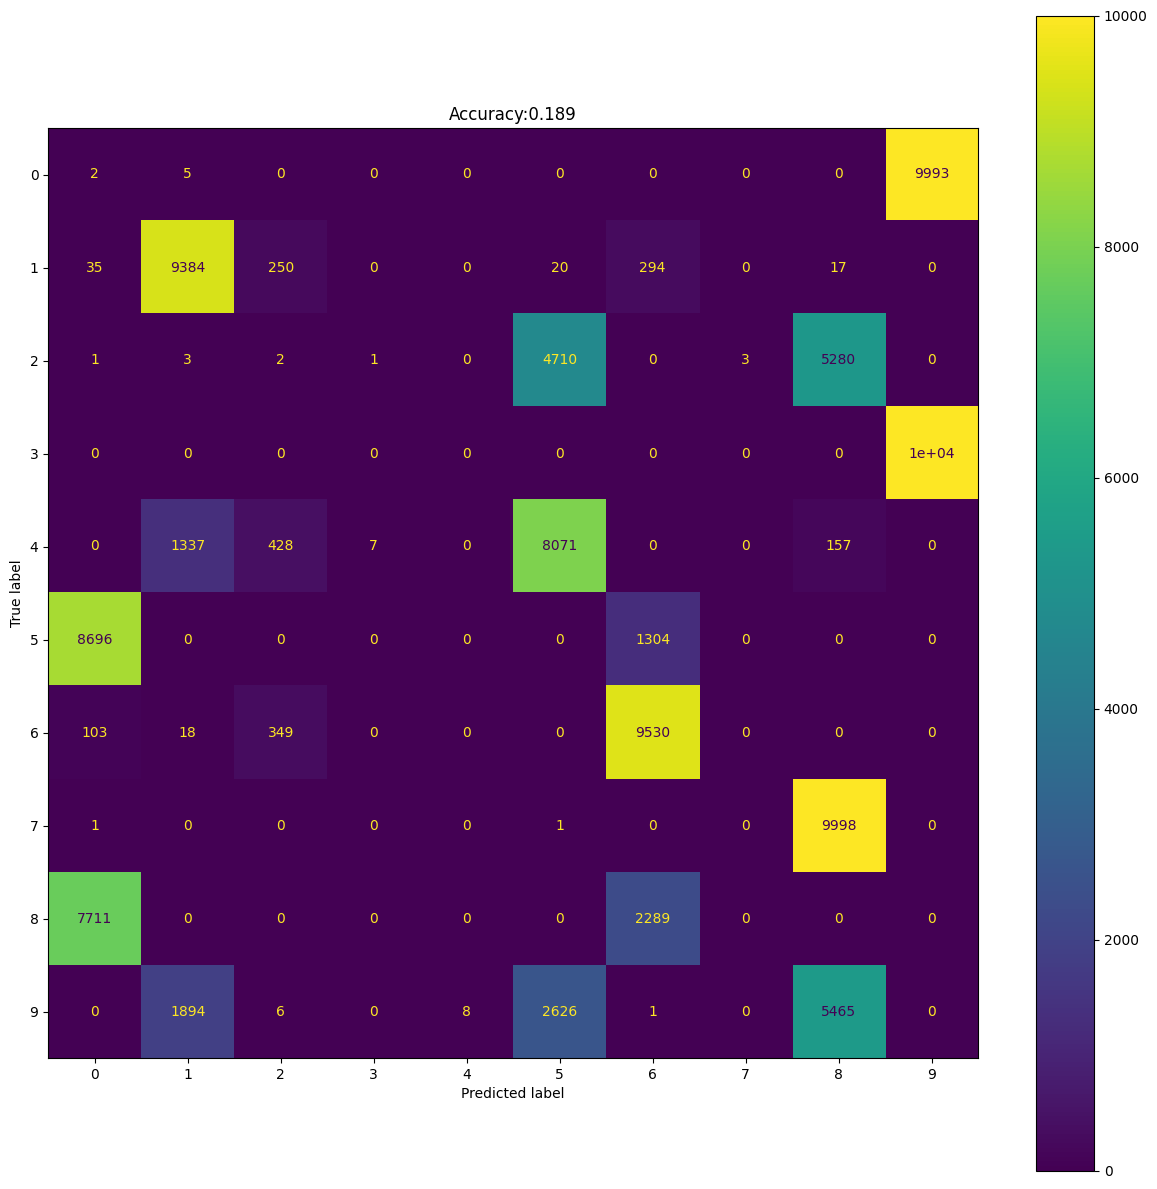

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.2609 - accuracy: 0.6695
Epoch 2/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.3949 - accuracy: 0.8653
Epoch 3/30
3125/3125 [==============================] - 11s 4ms/step - loss: 0.3393 - accuracy: 0.8782
Epoch 4/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.3122 - accuracy: 0.8855
Epoch 5/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.2951 - accuracy: 0.8902
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.2821 - accuracy: 0.8951
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.2724 - accuracy: 0.8988
Epoch 8/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.2644 - accuracy: 0.9016
Epoch 9/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.2577 - accuracy: 0.9046
Epoch 10/30
3125/3125 [==============================] - 14s 4ms/step - l

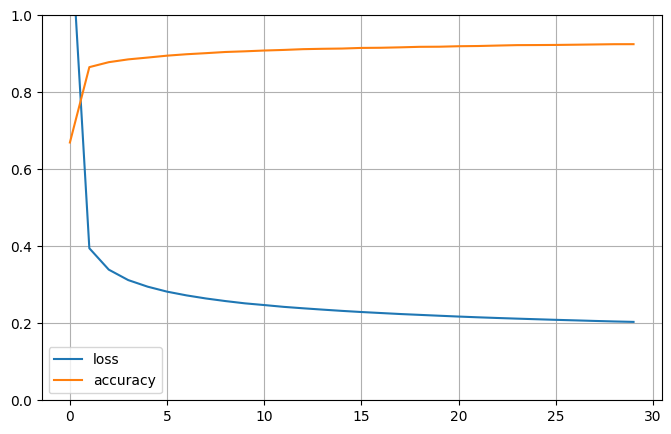

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.2018 - accuracy: 0.9262
test loss, test acc: [0.20175643265247345, 0.9262400269508362]


In [12]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[ 9995     5     0     0     0     0     0     0     0     0]
 [    0  9604     0     0    49    34   133     0     1   179]
 [    1     1  9977     0     2     0     2    13     1     3]
 [    0     0     0 10000     0     0     0     0     0     0]
 [    0    79     3     0  9115     0     1     2     0   800]
 [    0     0     0     0     0  8300    53     0  1647     0]
 [    0   105     0     0     0     3  9773     0   119     0]
 [    0     0    15     0     0     0     0  9892     1    92]
 [    0     0     0     0     0  2593   197     0  7210     0]
 [    1   141     3     0   970     0     1   126     0  8758]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.97      0.96      0.96     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       0.90      0.91      0

Test Accuracy:0.92624


Text(0.5, 1.0, 'Accuracy:0.926')

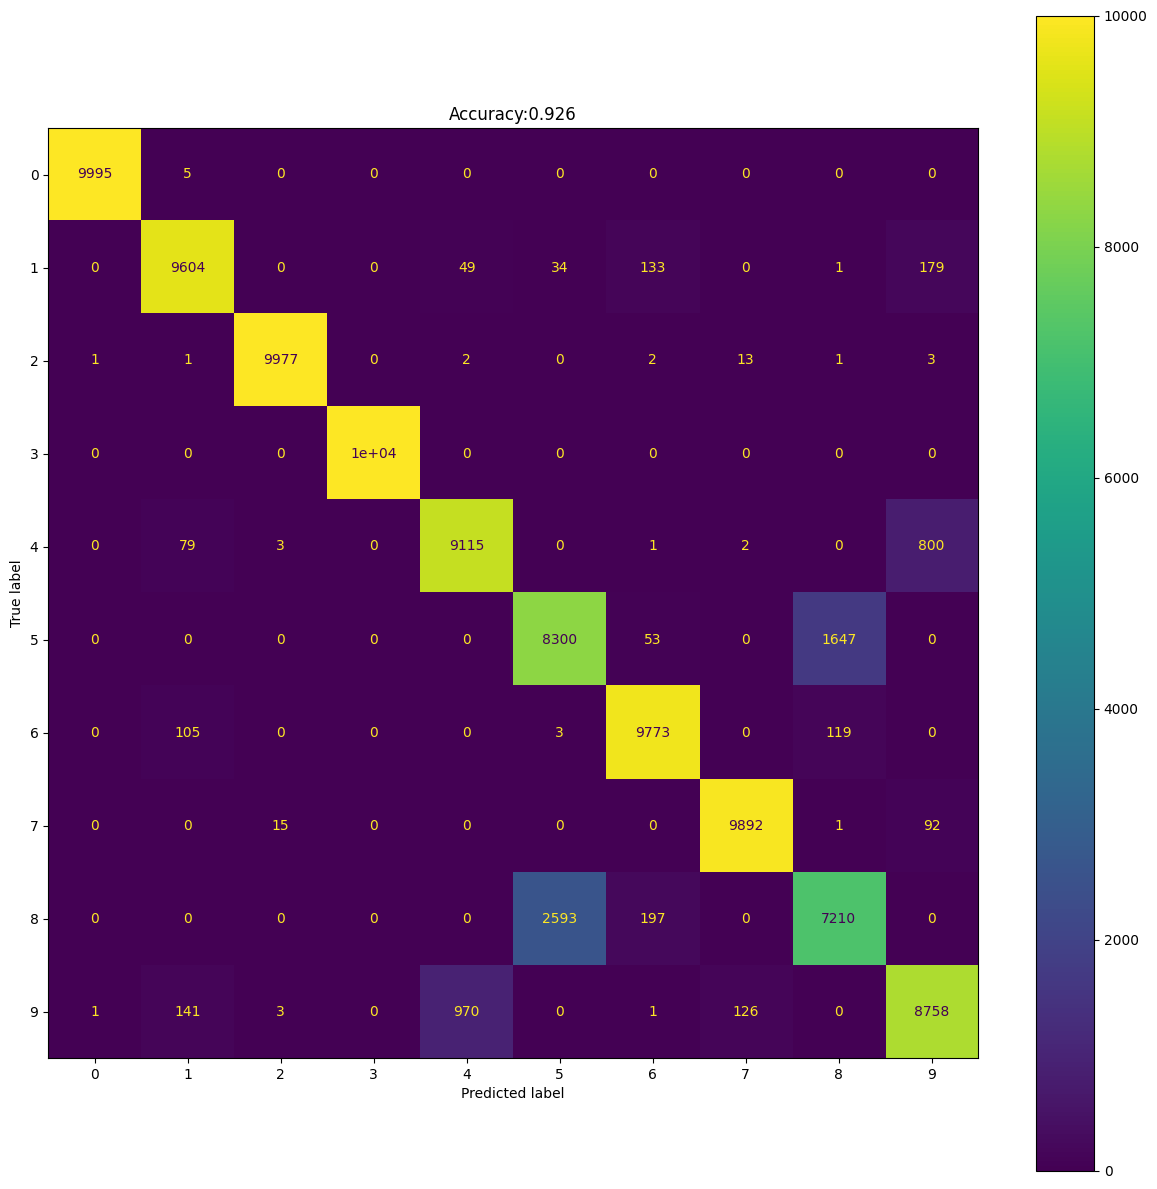

In [13]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(ii) model

Cross-model Validation without training

In [14]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(ii)_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [15]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 10.7204 - accuracy: 0.0968
test loss, test acc: [10.72044849395752, 0.09679000079631805]


In [16]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[   13     0     0     0     5     0    14    14  9947     7]
 [    0  1601     0     3  6559   146     0    38     0  1653]
 [    2    36    81     0   474  1554   567  4542  2742     2]
 [    0     0     0     0     0     0     0     0 10000     0]
 [    0   860    35     0  7885   114     1  1102     0     3]
 [    0   953     0  1905   895     0     0     1     0  6246]
 [    0    55     0     0   399     1     0     0     0  9545]
 [    1  2130  7724     6    46     0     0    93     0     0]
 [    0   593     0  1482  3314     0     0     2     0  4609]
 [    0   123     0     0  3910   891    13  5057     0     6]]
              precision    recall  f1-score   support

           0       0.81      0.00      0.00     10000
           1       0.25      0.16      0.20     10000
           2       0.01      0.01      0.01     10000
           3       0.00      0.00      0.00     10000
           4       0.34      0.79      0

Test Accuracy:0.09679


Text(0.5, 1.0, 'Accuracy:0.097')

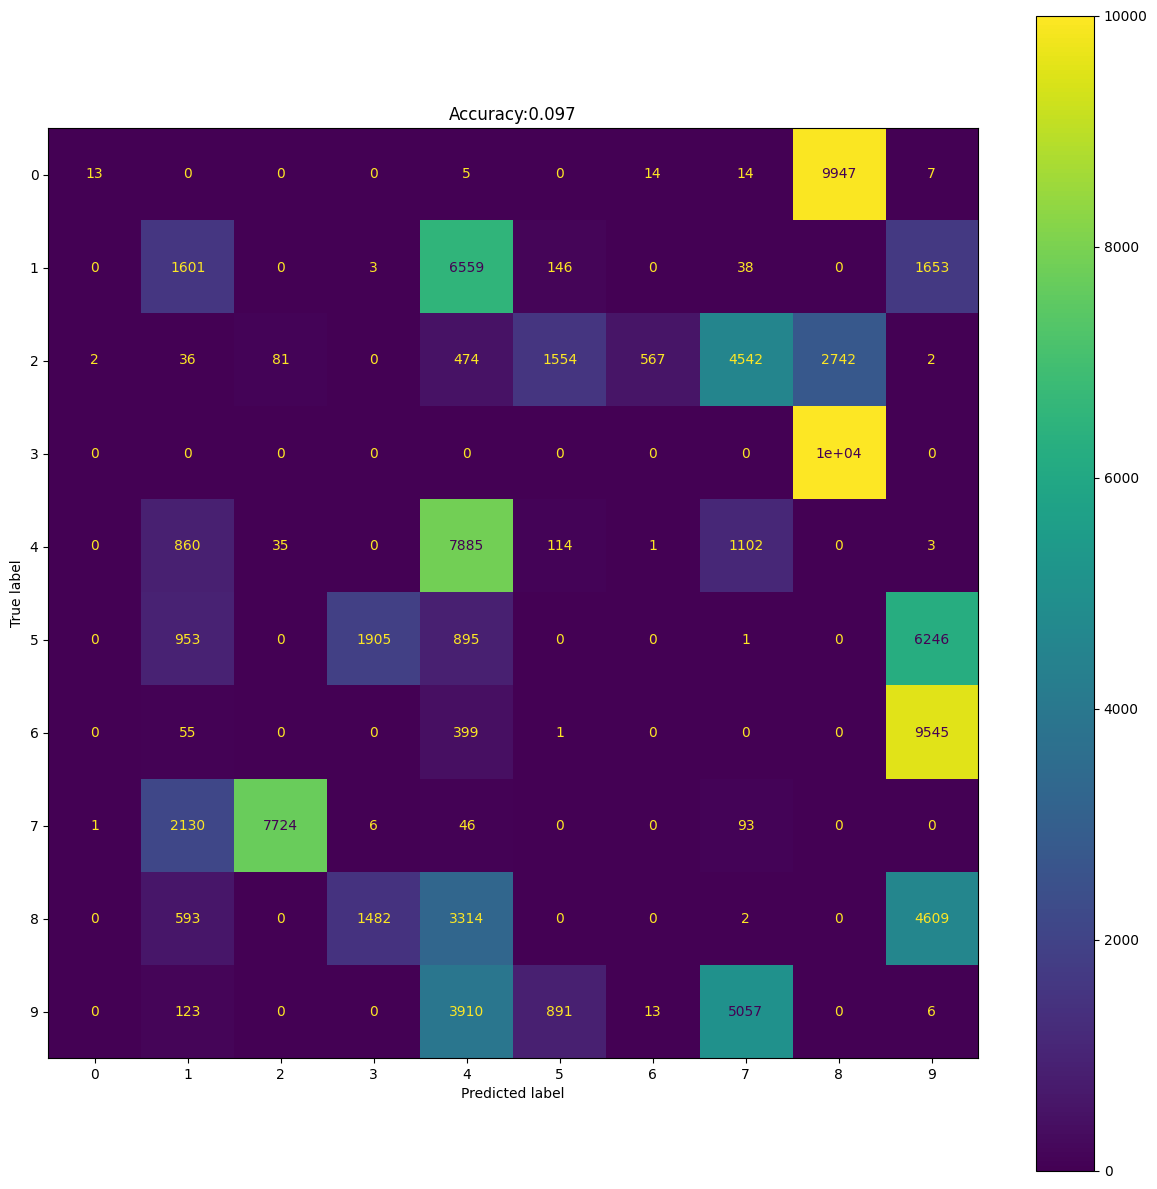

In [17]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [18]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [19]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.6281 - accuracy: 0.5385
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6429 - accuracy: 0.7063
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5393 - accuracy: 0.7452
Epoch 4/30
3125/3125 [==============================] - 20s 6ms/step - loss: 0.4813 - accuracy: 0.8378
Epoch 5/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.4420 - accuracy: 0.8738
Epoch 6/30
3125/3125 [==============================] - 18s 6ms/step - loss: 0.4135 - accuracy: 0.8812
Epoch 7/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.3910 - accuracy: 0.8876
Epoch 8/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3729 - accuracy: 0.8910
Epoch 9/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3578 - accuracy: 0.8946
Epoch 10/30
3125/3125 [==============================] - 14s 5ms/step - l

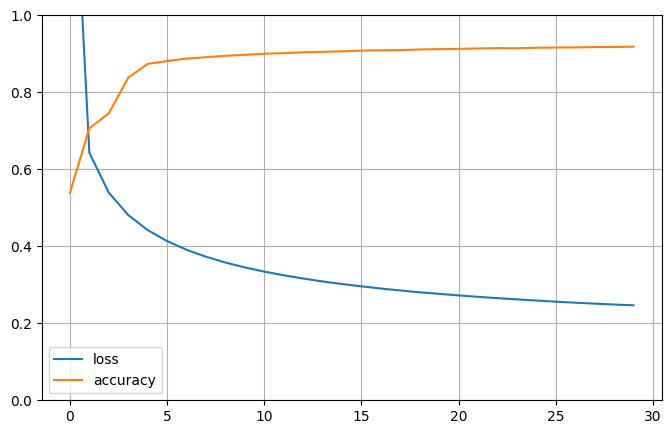

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 22s 7ms/step - loss: 0.2473 - accuracy: 0.9177
test loss, test acc: [0.2473091185092926, 0.9176599979400635]


In [22]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 27s 9ms/step
[[ 9974     1     0     0     5     0     3     7     0    10]
 [    0  9280     0     0   126    31   405     2     6   150]
 [    0     1  9938    24    28     0     3     4     0     2]
 [    0     0     0 10000     0     0     0     0     0     0]
 [    0   114    27     0  9211     0     1    97     0   550]
 [    0     1     0     0     0  6590   149     0  3260     0]
 [    0   301     0     0     0     4  9370     0   325     0]
 [    1     0    10     2    97     0     0  9889     0     1]
 [    0     0     0     0     0  1336   198     2  8464     0]
 [    0   171    22     0   753     0     1     3     0  9050]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.94      0.93      0.93     10000
           2       0.99      0.99      0.99     10000
           3       1.00      1.00      1.00     10000
           4       0.90      0.92      0

Test Accuracy:0.91766


Text(0.5, 1.0, 'Accuracy:0.918')

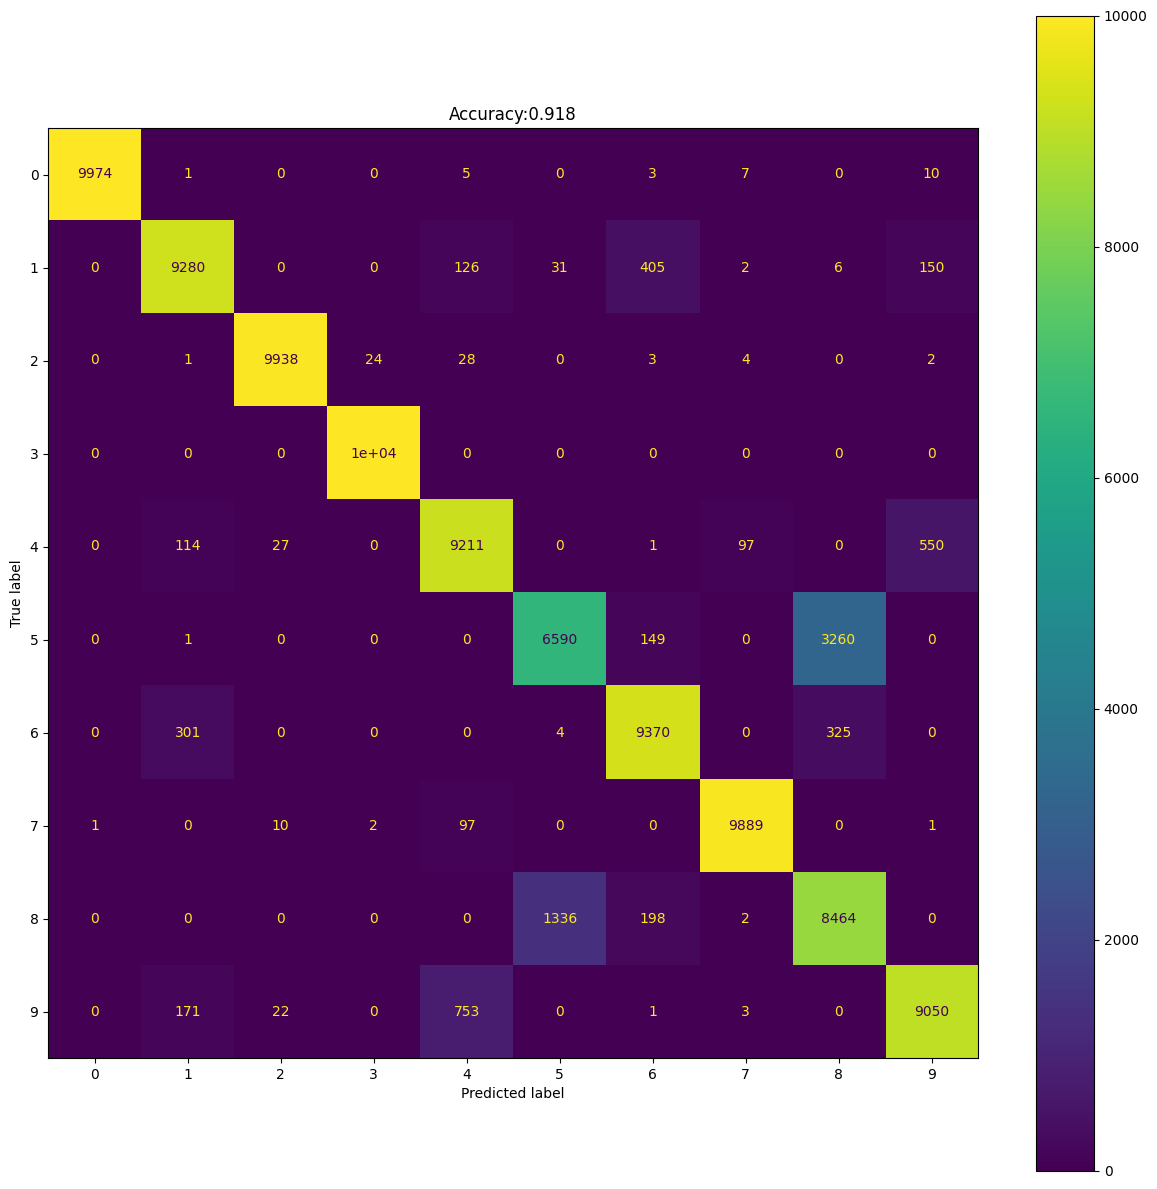

In [23]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(iii) model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(iii)_model.h5")
model.summary()

2023-02-22 15:42:59.038508: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 14.7652 - accuracy: 0.0000e+00
test loss, test acc: [14.765207290649414, 0.0]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[    0     1     1     2     0     0     2     0  9962    32]
 [    2     0   824  9174     0     0     0     0     0     0]
 [  428   378     0     1   184  7353  1655     1     0     0]
 [    0     0     0     0     0     0     0     0 10000     0]
 [   43   228  5294  4422     0     0    12     1     0     0]
 [    0     0   940  9060     0     0     0     0     0     0]
 [    0     0  1513  8487     0     0     0     0     0     0]
 [  139  1425  5410  3009     0     0    17     0     0     0]
 [    0     0  1669  8331     0     0     0     0     0     0]
 [   58    49  2734  7151     0     0     7     1     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00   10000.0
           1       0.00      0.00      0.00   10000.0
           2       0.00      0.00      0.00   10000.0
           3       0.00      0.00      0.00   10000.0
           4       0.00      0.00      0

Test Accuracy:0.0


Text(0.5, 1.0, 'Accuracy:0.000')

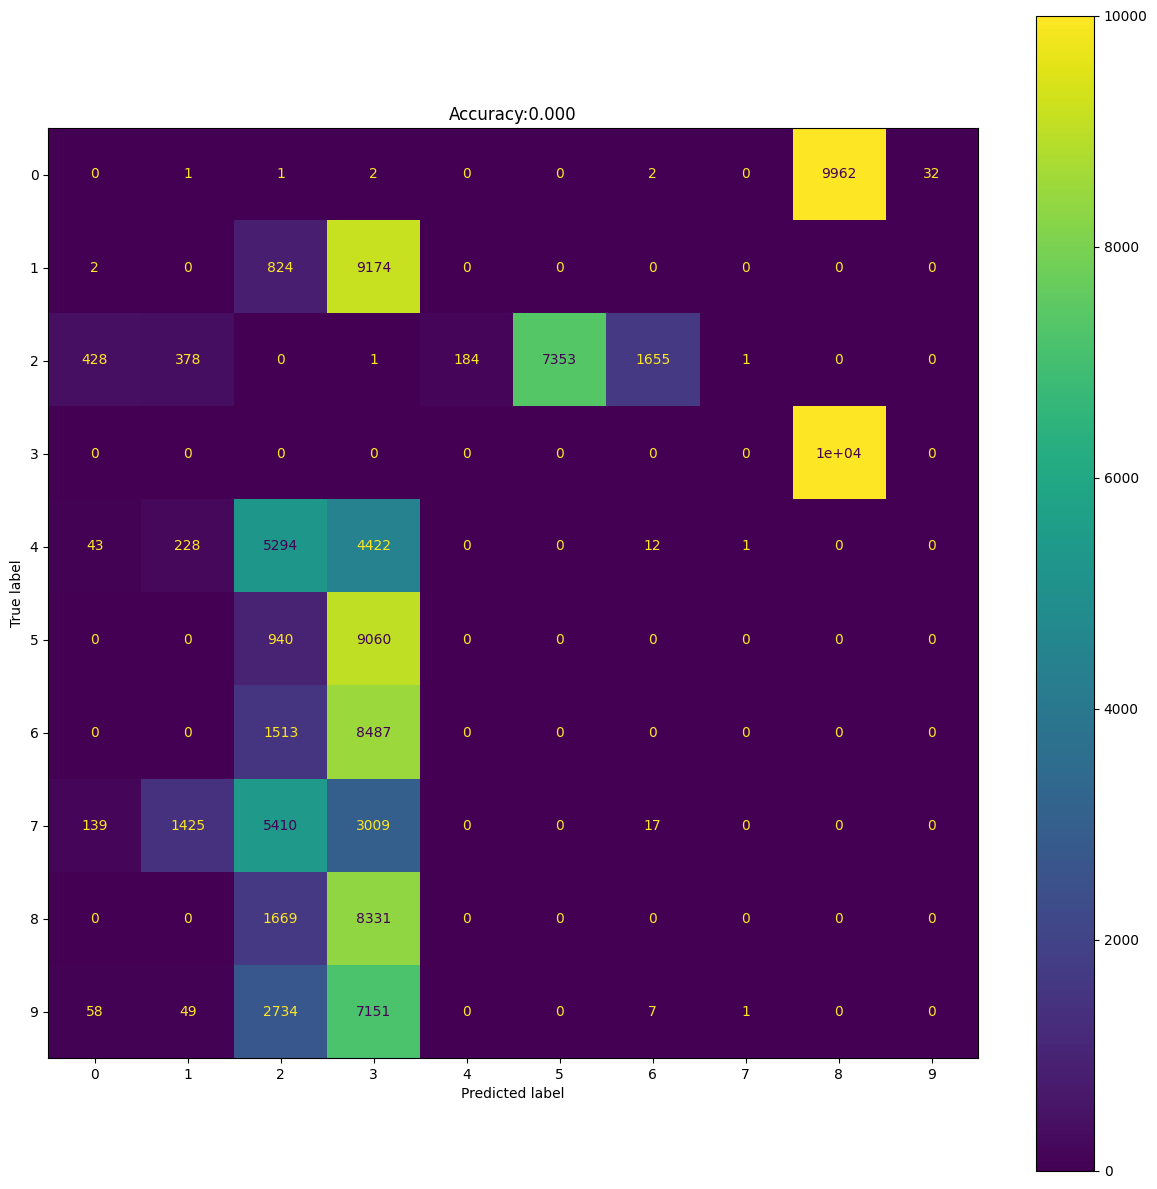

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.2742 - accuracy: 0.3520
Epoch 2/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.9509 - accuracy: 0.6689
Epoch 3/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.8217 - accuracy: 0.7149
Epoch 4/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7585 - accuracy: 0.7333
Epoch 5/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7174 - accuracy: 0.7450
Epoch 6/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6871 - accuracy: 0.7569
Epoch 7/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6637 - accuracy: 0.7628
Epoch 8/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6447 - accuracy: 0.7703
Epoch 9/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6292 - accuracy: 0.7757
Epoch 10/30
3125/3125 [==============================] - 14s 4ms/step - l

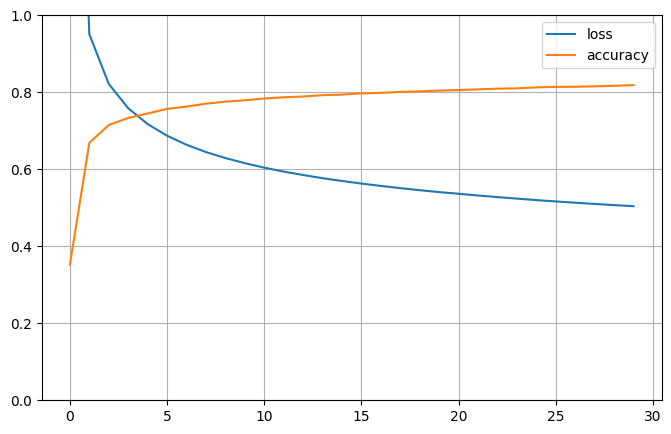

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.5024 - accuracy: 0.8158
test loss, test acc: [0.5023646354675293, 0.8157600164413452]


In [12]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[ 9994     0     0     0     5     0     0     1     0     0]
 [    1  8213     0     0   261   147  1012     5    27   334]
 [    0     0  9990     0     4     0     0     4     0     2]
 [    0     0     0 10000     0     0     0     0     0     0]
 [    0   246     3     0  7963     2    19   871     0   896]
 [    0    55     0     0     0  7655   218     0  2072     0]
 [    0  1604     0     0   220   973  5213     3  1982     5]
 [    0    26     6     0   836     1     0  8105     0  1026]
 [    0    53     0     0    26  1804   570     0  7547     0]
 [    0   906     2     0  1222     0     8   966     0  6896]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.74      0.82      0.78     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       0.76      0.80      0

Test Accuracy:0.81576


Text(0.5, 1.0, 'Accuracy:0.816')

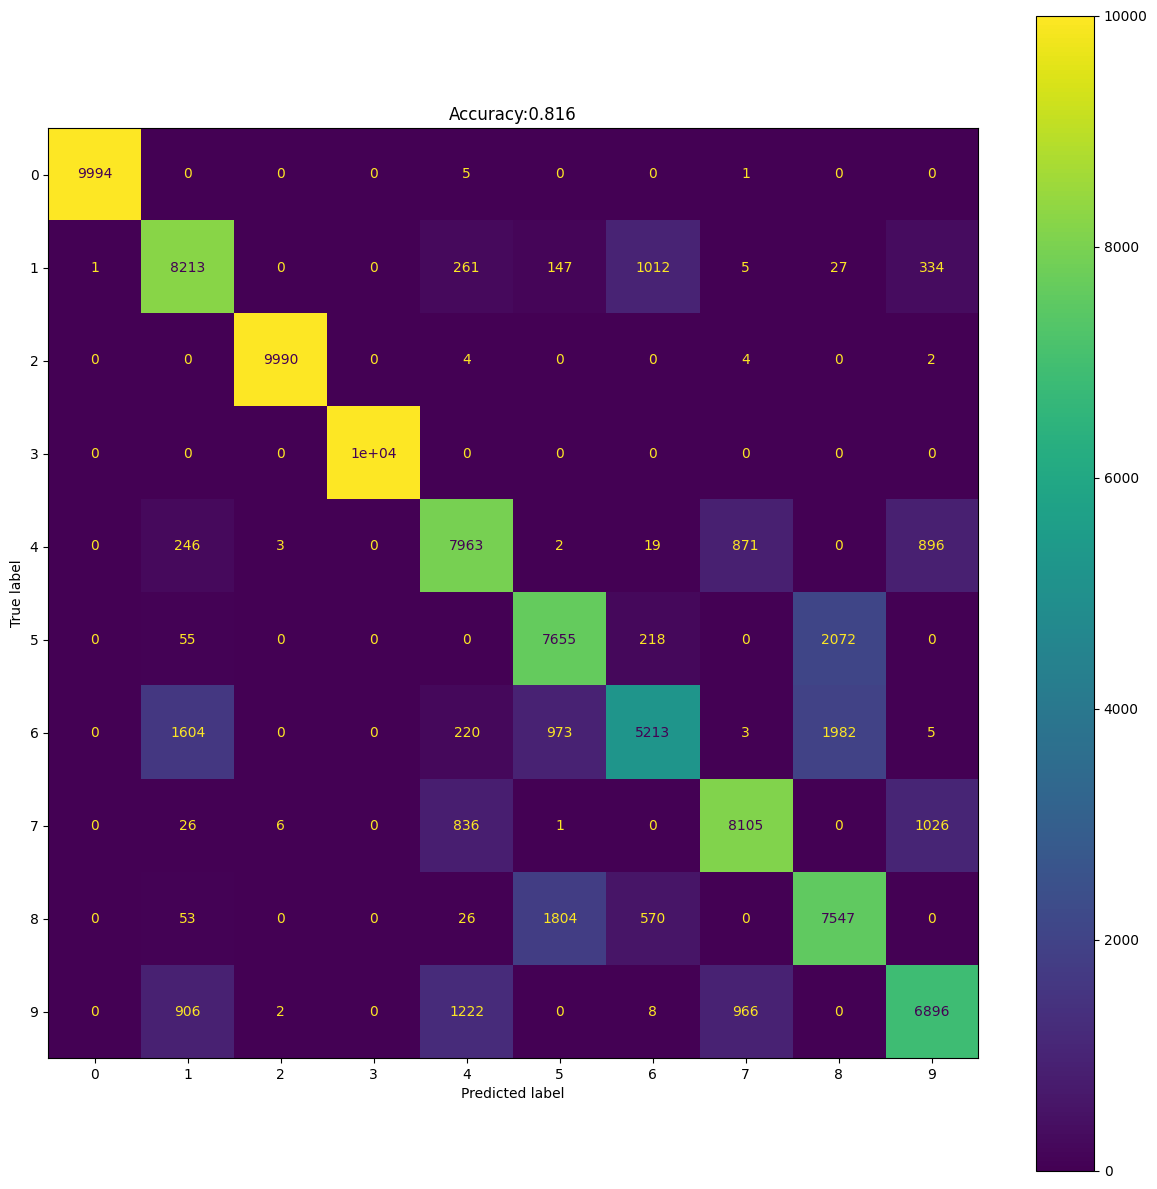

In [13]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data1 model

Cross-model Validation without training

In [14]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data1_model.h5")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [15]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 11.2948 - accuracy: 0.0042
test loss, test acc: [11.294801712036133, 0.004189999774098396]


In [16]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[    8     2     0     0     1     0     0    23  9959     7]
 [ 7381    74     0     0     0  2468    76     1     0     0]
 [    3     4     0     1  6234     0     1    29  3728     0]
 [    0     0     0     0  9570     0     0     0   430     0]
 [   35  1213     0  7239     0   750   183   580     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [ 9990     0     0     0     0    10     0     0     0     0]
 [    2  3196    27  6427    10     1     0   337     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [  900  2995     0   645     0  4607   717   136     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.01      0.01      0.01     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0

Test Accuracy:0.00419


Text(0.5, 1.0, 'Accuracy:0.004')

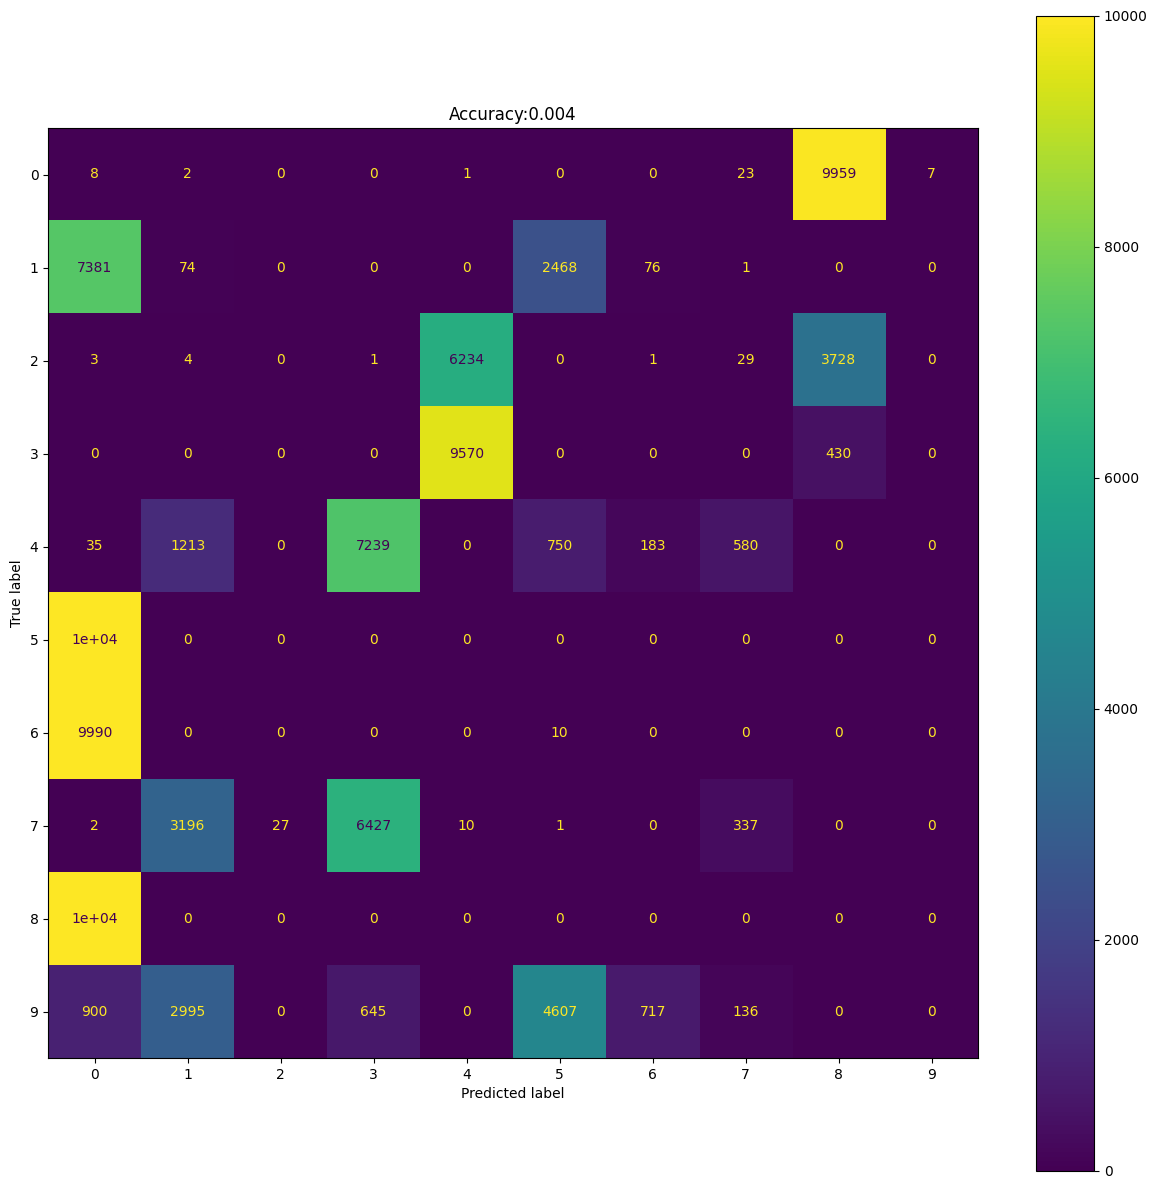

In [17]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [18]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [19]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.8129 - accuracy: 0.4299
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.8192 - accuracy: 0.6253
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6788 - accuracy: 0.7546
Epoch 4/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.6098 - accuracy: 0.8064
Epoch 5/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.5641 - accuracy: 0.8241
Epoch 6/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5303 - accuracy: 0.8347
Epoch 7/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5040 - accuracy: 0.8413
Epoch 8/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.4825 - accuracy: 0.8473
Epoch 9/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.4647 - accuracy: 0.8520
Epoch 10/30
3125/3125 [==============================] - 15s 5ms/step - l

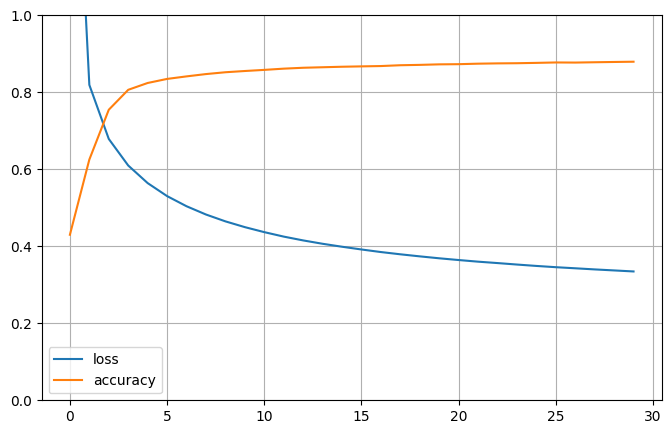

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.3332 - accuracy: 0.8771
test loss, test acc: [0.33322468400001526, 0.8771200180053711]


In [22]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[ 9987     2     0     0     0     0     1     6     0     4]
 [    0  9096     0     0     0    33   510     1     1   359]
 [    6     1  9982     3     2     0     2     2     0     2]
 [    0     0     0 10000     0     0     0     0     0     0]
 [    0     1     1     0  8375     0     0   624     0   999]
 [    0     0     0     0     0  8386   124     0  1490     0]
 [    0   301     0     0     0   201  9239     0   259     0]
 [    0     0     1     0   366     0     2  9593     0    38]
 [    0     0     0     0     0  5273   378     0  4349     0]
 [    0   414     0     0   832     0     7    42     0  8705]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.93      0.91      0.92     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       0.87      0.84      0

Test Accuracy:0.87712


Text(0.5, 1.0, 'Accuracy:0.877')

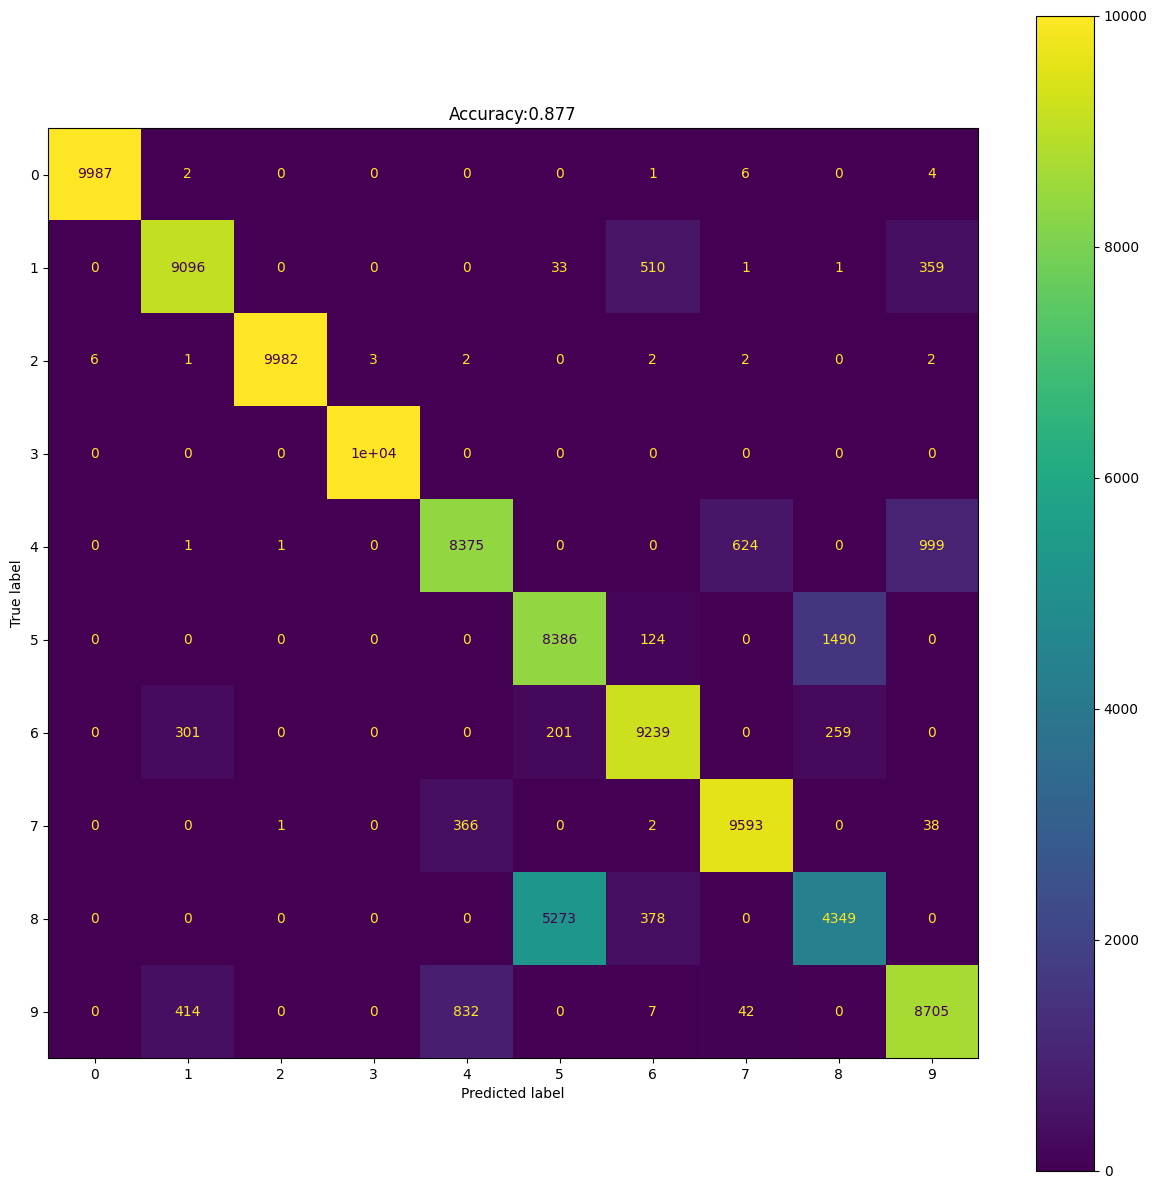

In [23]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data2 model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data2_model.h5")
model.summary()

2023-02-23 10:46:22.273503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 8.6008 - accuracy: 0.0597
test loss, test acc: [8.600784301757812, 0.059700001031160355]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[    9     3    12     9     6     0    22  9938     0     1]
 [ 8575    42     0  1180    11    87     0     0   105     0]
 [    1    42  5503     0     1     1  4370    73     1     8]
 [    0     0     0     0     0     0     0 10000     0     0]
 [  309  5389  1022     1     4    90    79     0  2956   150]
 [ 9720     0     0     0     0   280     0     0     0     0]
 [ 8583     0     0   263     0  1131     0     0    23     0]
 [   12  2451  6903     0   213     0   382    35     3     1]
 [ 9572     0     0     3     0   425     0     0     0     0]
 [ 2708  2380  1722   551    43   103     0     0  2396    97]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.36      0.55      0.44     10000
           3       0.00      0.00      0.00     10000
           4       0.01      0.00      0

Test Accuracy:0.0597


Text(0.5, 1.0, 'Accuracy:0.060')

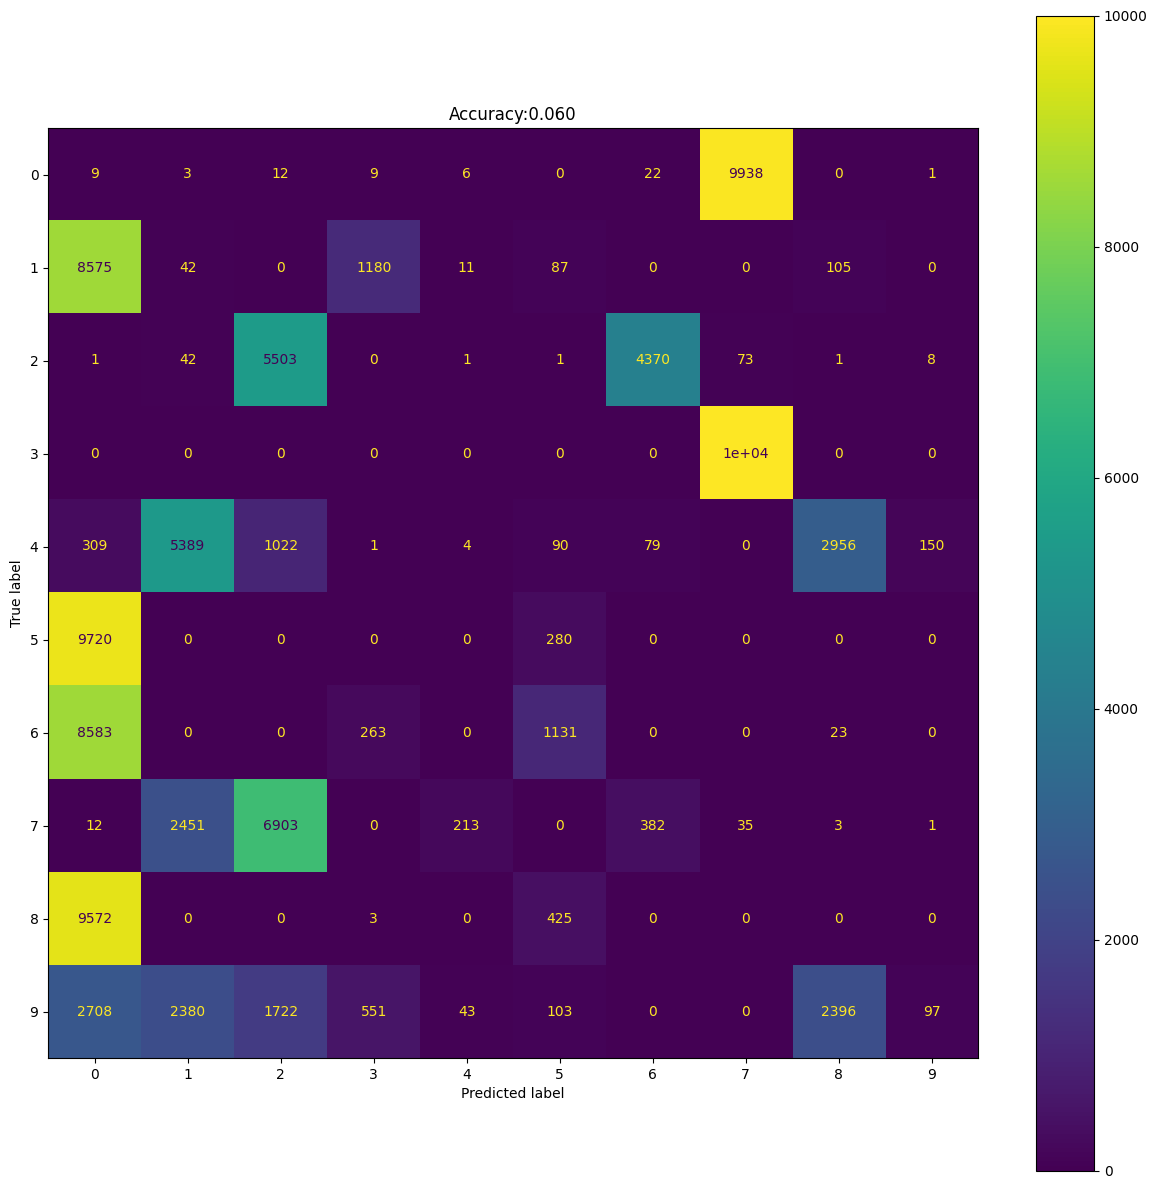

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.7747 - accuracy: 0.4626
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7877 - accuracy: 0.6652
Epoch 3/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6503 - accuracy: 0.7140
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5854 - accuracy: 0.7567
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5434 - accuracy: 0.8434
Epoch 6/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.5124 - accuracy: 0.8506
Epoch 7/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.4878 - accuracy: 0.8554
Epoch 8/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.4676 - accuracy: 0.8586
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4506 - accuracy: 0.8617
Epoch 10/30
3125/3125 [==============================] - 12s 4ms/step - l

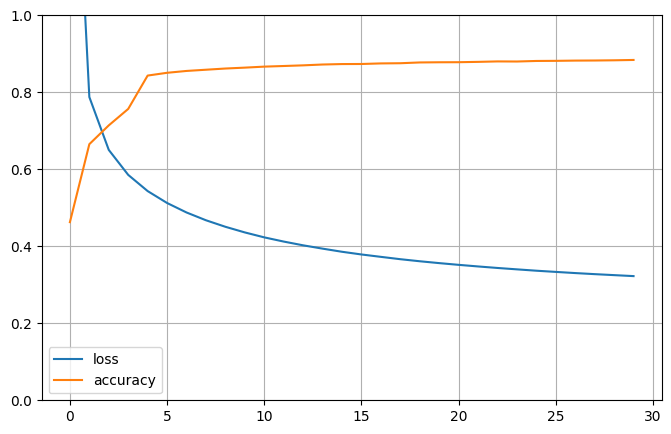

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.3234 - accuracy: 0.8792
test loss, test acc: [0.3234045207500458, 0.8791900277137756]


In [12]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[ 9980    10     0     0     3     0     0     7     0     0]
 [    0  9318     0     0     7    21   352     0    13   289]
 [    0     2  9958    14     3     0     0    19     1     3]
 [    0     0     0 10000     0     0     0     0     0     0]
 [    0     8     5     0  8666     0     1   236     0  1084]
 [    0     0     0     0     0  8596   174     0  1230     0]
 [    0   317     0     0     0   215  9284     0   184     0]
 [    0     1    63     1   207     0     1  9687     0    40]
 [    0     2     0     0     0  5570   530     0  3898     0]
 [    0   397     2     0  1002     0     3    64     0  8532]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.93      0.93      0.93     10000
           2       0.99      1.00      0.99     10000
           3       1.00      1.00      1.00     10000
           4       0.88      0.87      0

Test Accuracy:0.87919


Text(0.5, 1.0, 'Accuracy:0.879')

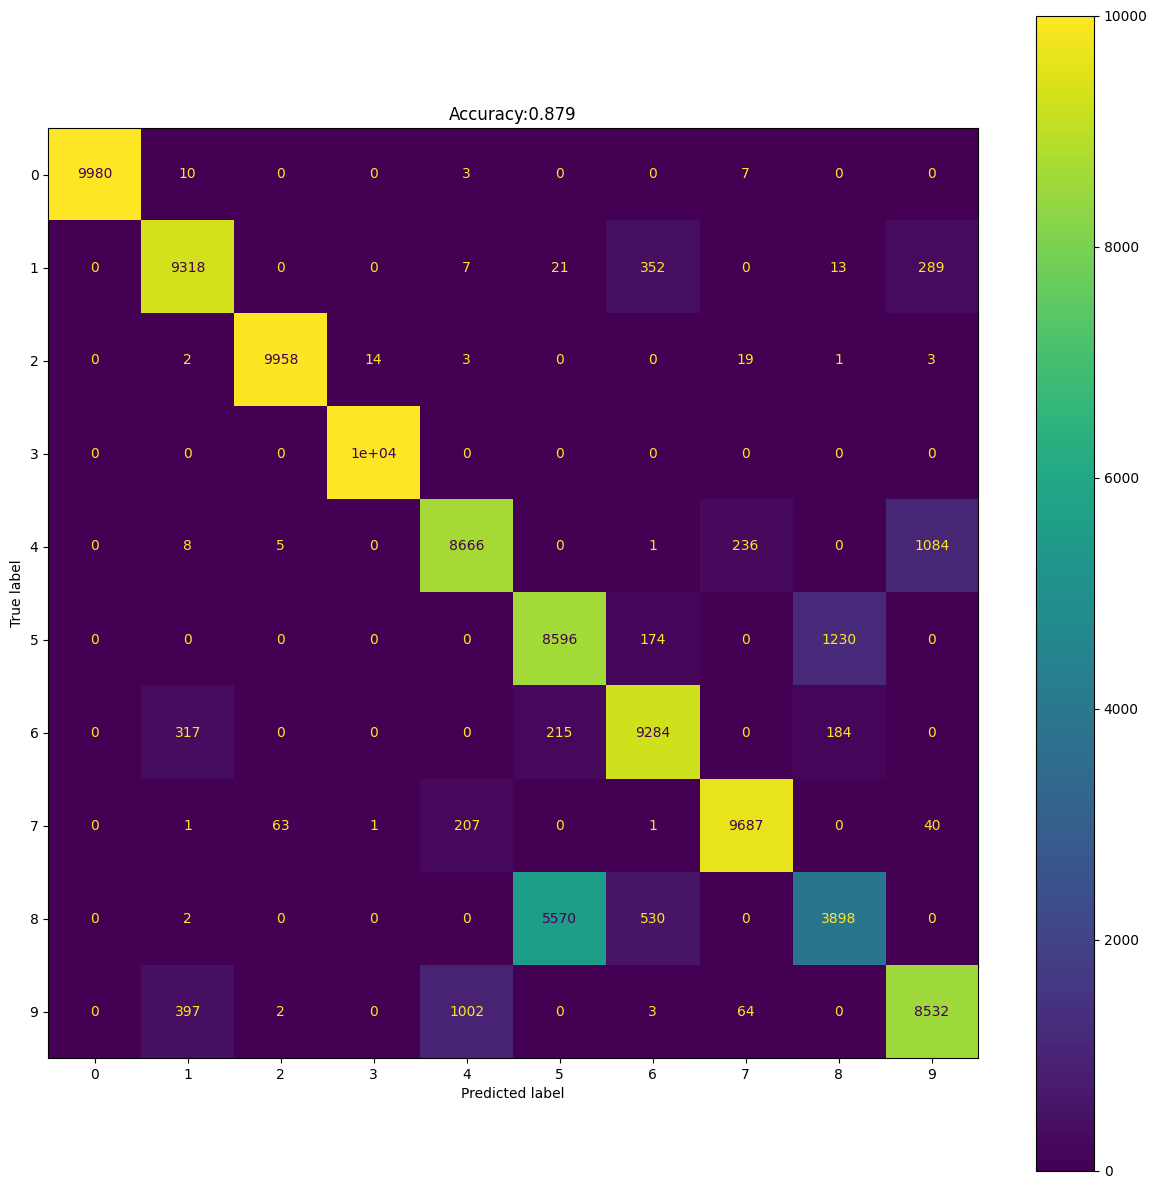

In [13]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_II model

Cross-model Validation without training

In [14]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_II_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [16]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 5ms/step - loss: 6.6284 - accuracy: 0.1796
test loss, test acc: [6.628418922424316, 0.17960000038146973]


In [17]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[9995    5    0    0    0    0    0    0    0    0]
 [  29 1420    0    0    9    1    0    3    5 8533]
 [   0    2 5276    1    0 3536    0 1182    0    3]
 [   0    0 9814    0    0    0    0  186    0    0]
 [   0 8040    0    0    0 1819    0    0  103   38]
 [   0    0    0    0 9995    0    0    0    0    5]
 [   0    8    0    0 1594    0    0    0    1 8397]
 [   0 6734    0 3211    0    9    0    0   46    0]
 [   1    0    0    0 9766    0    0    0    0  233]
 [   0 8641    0    0    0   90    0    0    0 1269]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.06      0.14      0.08     10000
           2       0.35      0.53      0.42     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.00      0.0

Test Accuracy:0.1796


Text(0.5, 1.0, 'Accuracy:0.180')

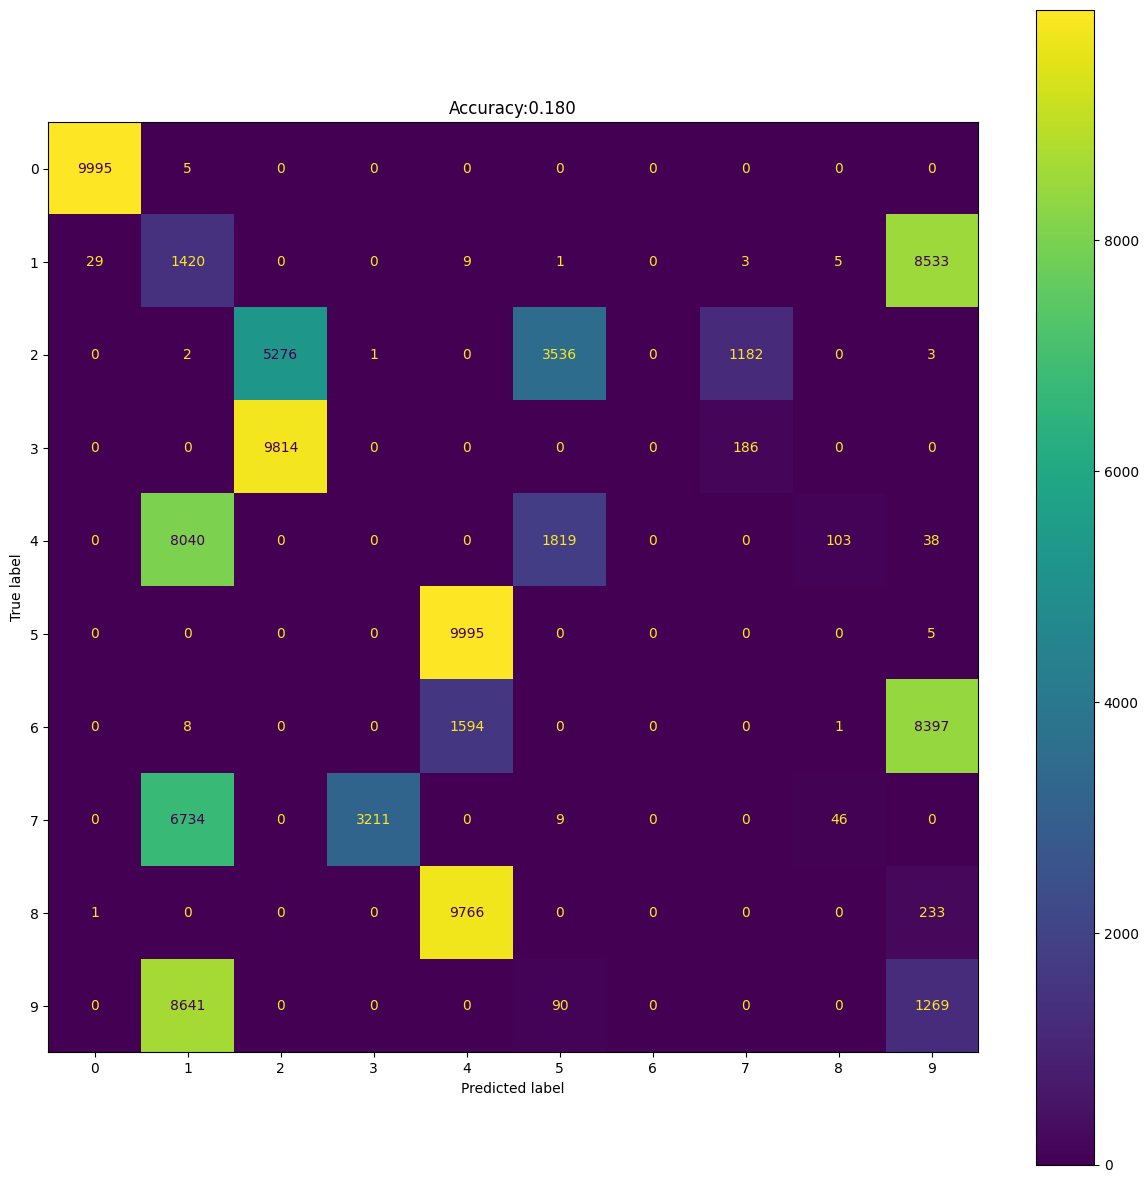

In [18]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [19]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [20]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.9205 - accuracy: 0.6964
Epoch 2/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.4053 - accuracy: 0.8608
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3447 - accuracy: 0.8872
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3123 - accuracy: 0.8989
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.2905 - accuracy: 0.9066
Epoch 6/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.2748 - accuracy: 0.9114
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.2629 - accuracy: 0.9153
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.2533 - accuracy: 0.9178
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.2456 - accuracy: 0.9203
Epoch 10/30
3125/3125 [==============================] - 12s 4ms/step - l

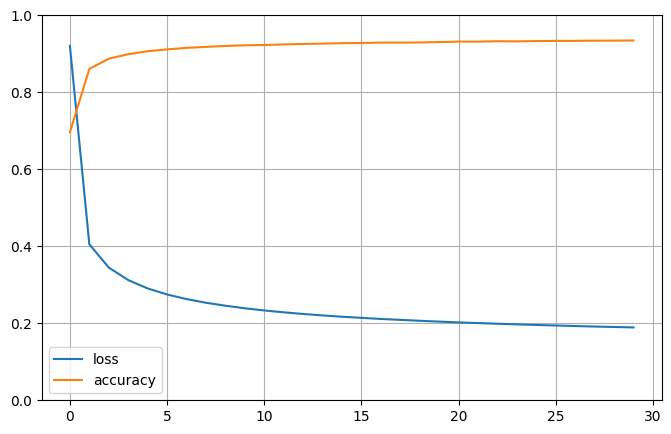

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.1893 - accuracy: 0.9334
test loss, test acc: [0.18930119276046753, 0.9334499835968018]


In [23]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[ 9995     0     0     0     0     0     0     0     0     5]
 [    1  9608     0     0     5    31   176     1     5   173]
 [    0     0  9992     0     2     0     3     2     0     1]
 [    0     0     0 10000     0     0     0     0     0     0]
 [    0     5     1     0  9546     0     0   214     0   234]
 [    0     0     0     0     0  8534    32     0  1434     0]
 [    0   204     0     0     0    12  9598     0   186     0]
 [    0     0     0     0   316     1     0  9683     0     0]
 [    0     0     0     0     0  2793   314     0  6893     0]
 [    0   261     1     0   231     0     1    10     0  9496]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.95      0.96      0.96     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       0.95      0.95      0

Test Accuracy:0.93345


Text(0.5, 1.0, 'Accuracy:0.933')

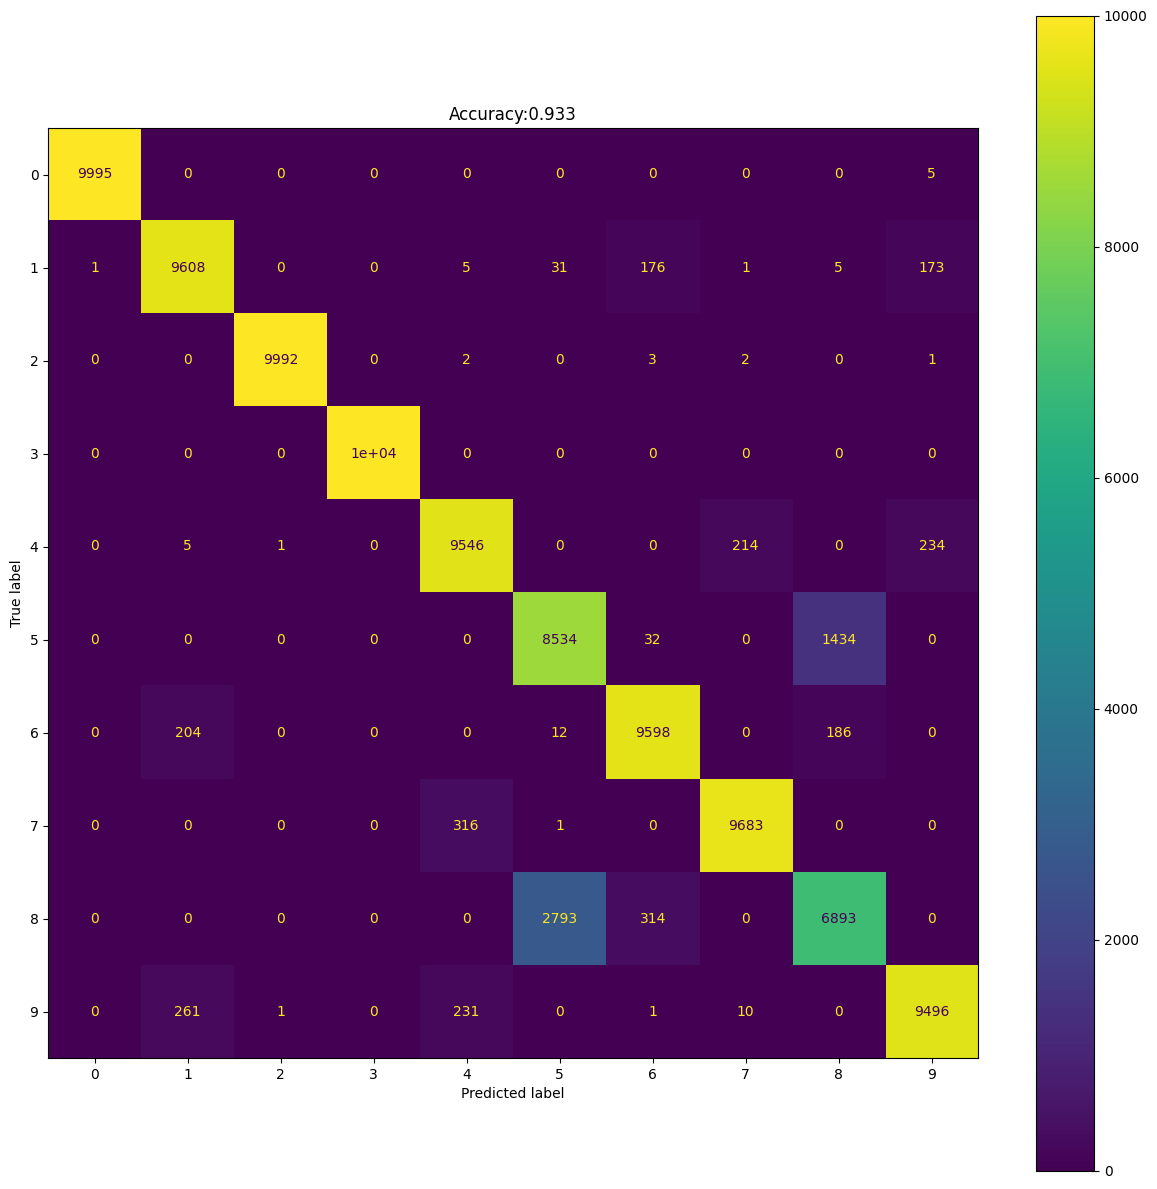

In [24]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_III model

In [25]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_III_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [26]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 16.0551 - accuracy: 0.0308
test loss, test acc: [16.055118560791016, 0.030780000612139702]


In [27]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[    0    12     2     0     0     0    39  9906    40     1]
 [   16     1     0     1    13     1     8     2  9958     0]
 [    0     0     0     1     0     1     0     0  9998     0]
 [    0     0     0     0     0     0     0     0 10000     0]
 [    0     0     0     1     0     0     0     1  9998     0]
 [    0     1   267  2705     1   776    19  4708  1521     2]
 [    0     0     0     1     0     3    10    83  9902     1]
 [    0     0     0     0     0     0     1     1  9998     0]
 [    0     2     4    55     1   989    19  6640  2290     0]
 [    0     0     0     0     0     1     0     0  9999     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.06      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0

Test Accuracy:0.03078


Text(0.5, 1.0, 'Accuracy:0.031')

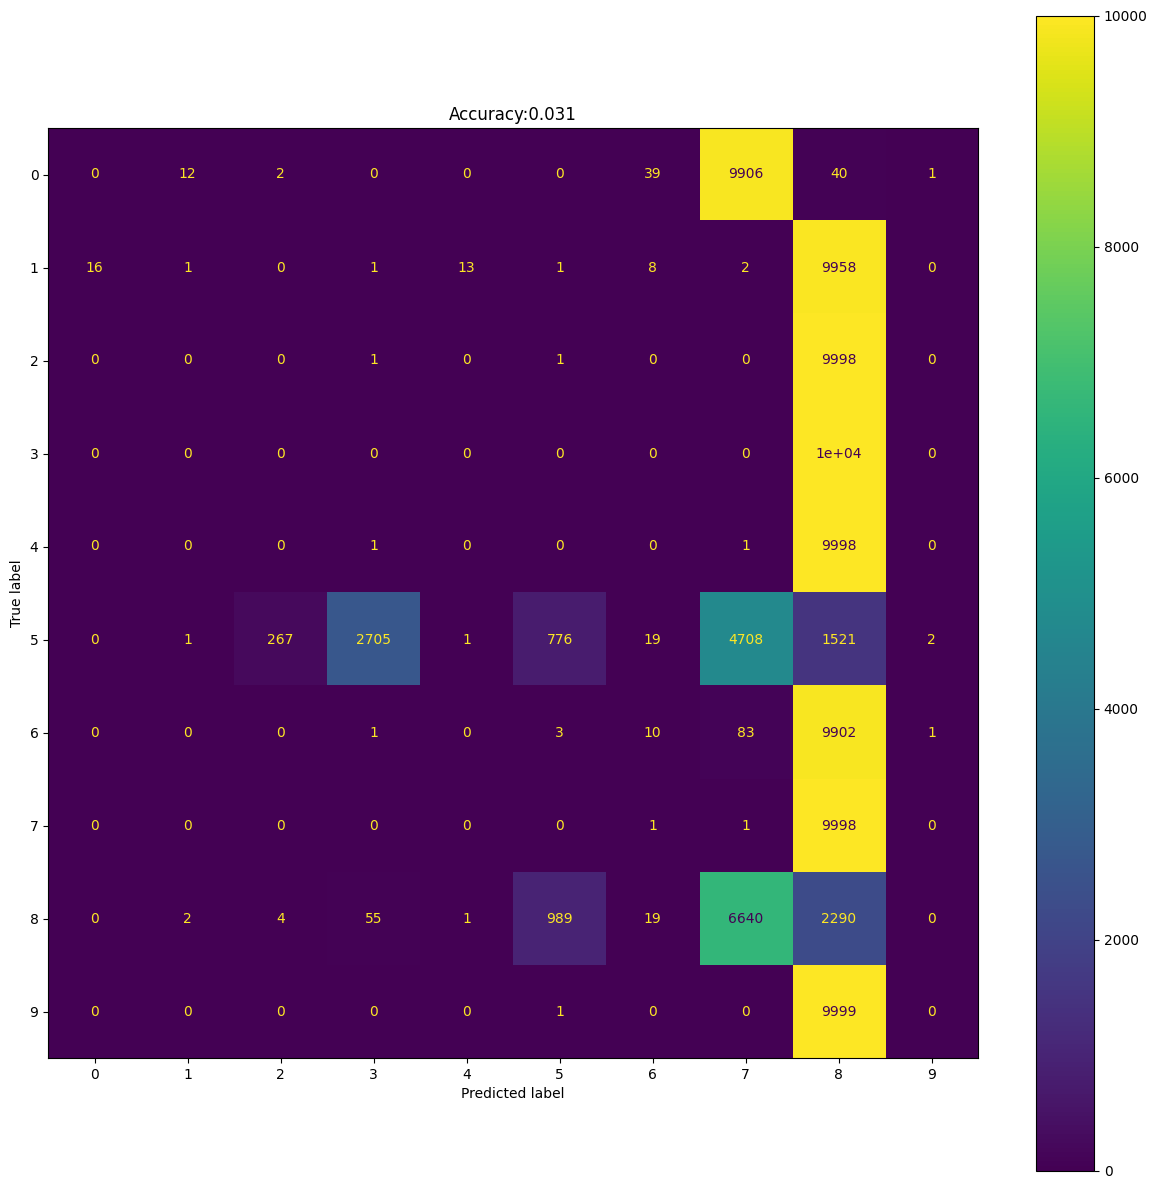

In [28]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [29]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [31]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3821 - accuracy: 0.9049
Epoch 2/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3771 - accuracy: 0.9061
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3725 - accuracy: 0.9065
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3680 - accuracy: 0.9071
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3640 - accuracy: 0.9081
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3598 - accuracy: 0.9077
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3562 - accuracy: 0.9094
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3527 - accuracy: 0.9094
Epoch 9/30
3125/3125 [==============================] - 19s 6ms/step - loss: 0.3491 - accuracy: 0.9099
Epoch 10/30
3125/3125 [==============================] - 14s 5ms/step - l

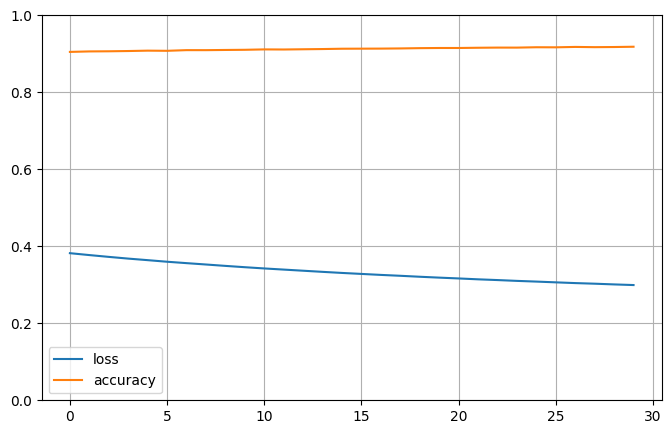

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [33]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.2979 - accuracy: 0.9194
test loss, test acc: [0.29793548583984375, 0.9193800091743469]


In [34]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[ 9984    11     0     0     1     0     3     0     1     0]
 [    0  9056     0     0   247    17   271     0     1   408]
 [    0     2  9739     0     1     3     0   254     0     1]
 [    0     0     0 10000     0     0     0     0     0     0]
 [    0   132    24     0  8075     2     0   105     1  1661]
 [    0     0     0     0     0  9087     1     0   912     0]
 [    2   423     0     0    15     2  9545     0    11     2]
 [    0     1   220     0     5     2     1  9730     1    40]
 [    1     1     0     0     0   835    55     0  9108     0]
 [    0   482    31     0  1743     2     1   127     0  7614]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.90      0.91      0.90     10000
           2       0.97      0.97      0.97     10000
           3       1.00      1.00      1.00     10000
           4       0.80      0.81      0

Test Accuracy:0.91938


Text(0.5, 1.0, 'Accuracy:0.919')

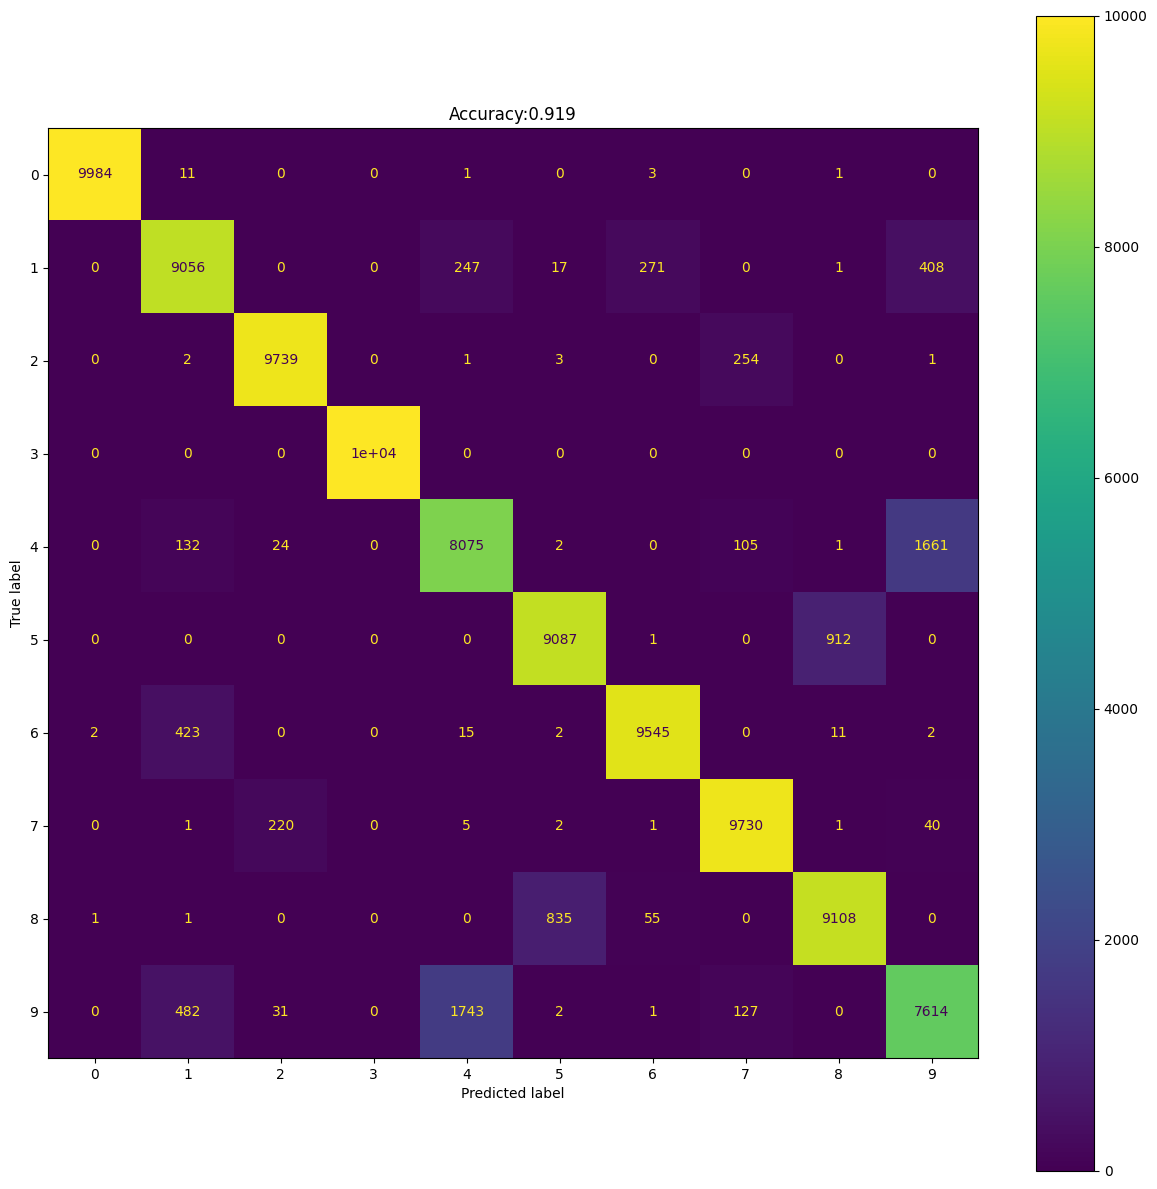

In [35]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')